# Case 1. Heart Disease Classification
Mr.Pasin Jiratthitcheep<br>
Last edited: 03.02.2019<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

This task is to create and train a dense neural network to predict to classify the presence of heart disease.

We have to try different neural network architectures (number of layers, number of neurons within layer), batch sizes and number of epochs, and compare them with each other. Try to find the simplest and smallest possible model and settings that solves the problem most accurately.

And also :
- learn to read data from external sources using pandas’ read_csv -function
- use keras’ neural networks to make an expert system to support in diagnostic decision making
- learn to test model architectures (number of layers, number of units, activation functions), solver optimizers and training settings (epochs, batch sizes, validation splits)
- use matplotlib’s visualization tools to make graphical presentations of the training and validation results
- learn to document the results clearly and in easily readable format

## 2. Required libraries

In [1]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

# for hiding warning message while running 
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## 3. Data description

I use a dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ that contains 4 databases concerning heart disease diagnosis. The dataset that I choose is only <b>processed.cleveland.data</b> which contains 303 records of diagnosis with following features :

1. age: age in years     
2. sex: sex<br>
    -- Value 0: female<br>
    -- Value 1: male<br>   
3. cp: chest pain type<br>
    -- Value 1: typical angina<br>
    -- Value 2: atypical angina<br>
    -- Value 3: non-anginal pain<br>
    -- Value 4: asymptomatic<br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl<br>
    -- Value 0: false<br>
    -- Value 1: true<br>  
7. restecg: resting electrocardiographic results<br>
    -- Value 0: normal<br>
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina<br>
    -- Value 0: no<br>
    -- Value 1: yes<br>
10. oldpeak: ST depression induced by exercise relative to rest   
11. slope: the slope of the peak exercise ST segment<br>
    -- Value 1: upsloping<br>
    -- Value 2: flat<br>
    -- Value 3: downsloping<br>
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:<br>
    -- Value 3: normal<br>
    -- Value 6: fixed defect<br>
    -- Value 7: reversable defect<br> 
14. num: diagnosis of heart disease

This dataset have no header and index column, use comma (',') as the column separator, and represent Nan value by '?'.

In [2]:
# Import data from url 
urlCleveland = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
dataframe = pd.read_csv(urlCleveland, 
                        sep = ',', 
                        header = None, 
                        index_col = None,
                        na_values = '?')

# show 15 records in dataset
dataframe.sample(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
51,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0
118,63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3
236,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2
200,50.0,0.0,4.0,110.0,254.0,0.0,2.0,159.0,0.0,0.0,1.0,0.0,3.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
267,59.0,1.0,3.0,126.0,218.0,1.0,0.0,134.0,0.0,2.2,2.0,1.0,6.0,2
150,52.0,1.0,1.0,152.0,298.0,1.0,0.0,178.0,0.0,1.2,2.0,0.0,7.0,0
81,53.0,0.0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.0,3.0,0
137,62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,3
114,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,2


## 4. Preprocessing

In [3]:
# setting column name to dataset
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal','num']

dataframe.columns = name_list

From the descriptive statistics of dataset, count value show that in the dataset has some missing value in column 11 and 12.

In [4]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Try to look at the records those have a missing value. I found that it is just a few records, so I decided to drop those records instead of filling by some value, then reset index of the rest.

In [5]:
dataframe[dataframe.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [6]:
# drop the rows that contain NaN value and reset index of the rest.
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

For this document, I want to classify only for healthy(0) and unhealthy(1) cases, but the label column still contain value of 0-4. So, I replace value 2-4 with 1 in 'num' column. After that I show the number of each class in histogram.

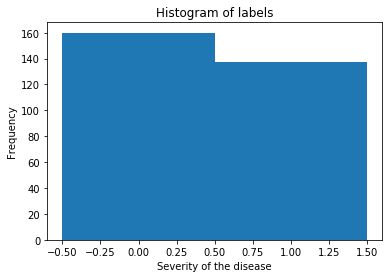

In [7]:
#replace other labels with 1 (unhealthy)
dataframe = dataframe.replace({'num' : { 2 : 1, 3 : 1, 4: 1 }})
label = dataframe['num']

# Plot the histogram of the labels
plt.hist(label, bins = [-0.5, 0.5, 1.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
plt.show()

Next, I try to figure out which features are important or not important for classification by using correlation. Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other with range -1 to 1.
    * -1 : Strong negative<br>
    *  0 : No correlation<br>
    *  1 : Strong positive

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalac   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

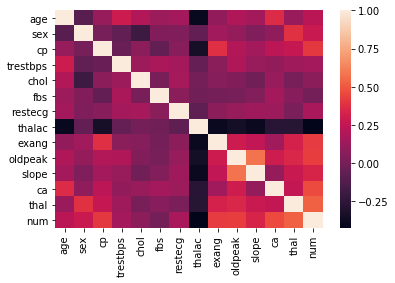

In [8]:
#try to show correlation of each features for selecting features
corr = dataframe.corr()
sns.heatmap(corr)
print(corr)

From correlation value of each feature with the label, I decided to drop the features which have correlation with label in range -0.3 to 0.3 ["age","sex","trestbps","chol","fbs","restecg"] that mean they don't have any correlation with Heart disease diagnosis.

In [9]:
# drop features with correlation in range -0.3 to 0.3
dataframe_corr = dataframe.copy()
dataframe_corr.drop(["age","sex","trestbps","chol","fbs","restecg"],axis=1, inplace=True)

Seperate feature and label

In [10]:
X_corr = dataframe_corr.iloc[:,0:7]
y_corr = dataframe_corr.num

Data description show that the dataset has some features which it is categorical feature type. I decide to do one-hot encoding to those features because each type of one feature should have the same weight in term of magnitude.<br>

For example, if some feature has 10 possible categories representing by number 0-9 and we don't encode them as one-hot, the category, representing by 9, will has weight in calculation more than category, representing by 0. I think that it doesn't make sense.

In [11]:
# do one-hot encoding to the features which it is categorical feature type, and concatenate them to the original
X_corr = pd.concat([X_corr,pd.get_dummies(X_corr['cp'],prefix='cp')],axis=1)
X_corr = pd.concat([X_corr,pd.get_dummies(X_corr['slope'],prefix='slope')],axis=1)
X_corr = pd.concat([X_corr,pd.get_dummies(X_corr['thal'],prefix='thal')],axis=1)

# drop the old feature
X_corr.drop(['cp','thal','slope'], axis=1, inplace=True)

From my experiment, I tried many possible way for preprocessing <b>(only standardize, only normalize, both, and do nothing)</b> and the result show that only standardize way make I get the highest accuracy score, so I choose this way.

Last step of preprocessing is that I create preprocessing function for standardize the numberical features ['thalac','oldpeak','ca'] and I decide to standardize the training-set, then use the same scale to standardize the validation-set to make sure that statistical value of validation-set won't affect the training-set.

In [12]:
def preprocess_scaler_corr (X_train, X_val):
    X_train_pre_scale = X_train[['thalac','oldpeak','ca']]
    X_train.drop(['thalac','oldpeak','ca'], axis='columns', inplace=True)
    X_train = X_train.reset_index(drop=True)

    X_val_pre_scale = X_val[['thalac','oldpeak','ca']]
    X_val.drop(['thalac','oldpeak','ca'], axis='columns', inplace=True)
    X_val = X_val.reset_index(drop=True)
    
    # #standardize those features
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_pre_scale)
    X_train_scaled = pd.DataFrame(X_train_scaled)
    
    # use the same scaler from training-set to standardize the validation-set
    X_val_scaled = scaler.transform(X_val_pre_scale)
    X_val_scaled = pd.DataFrame(X_val_scaled)
    
    # merge scaled data back to the rest data
    X_train = pd.concat([X_train_scaled,X_train],axis=1)
    X_val = pd.concat([X_val_scaled,X_val],axis=1)
    
    return X_train, X_val

## 5. Modeling and compilation




For modeling the best model, I have tried many combinations of the number of layers (3-5 layers), activation function (["softmax","relu","softplus","softsign","tanh","sigmoid"]), the number of neuron in each layer ([32,48,64,72,128]), optimizer (["rmsprop","adagrad","adam","adadelta","nadam"]), and also the number of epochs (I fitted those model with 200 epochs first, and then look at the trend of loss function before select epochs that it make least average loss).

Even also try to add batchNormalization to the model (but it seem doesn't work well).

** You can see from my draft version of my notebook if you want **
https://github.com/pasinJ/cognitive-systems-for-healthtechnology-applications/blob/master/Case%201.%20Heart%20Disease%20(draft).ipynb

Then, I ended up with these top 3 models, with highest accuracy score, as following:

### Model 1
This model model is sequential architecture with <b>four layers</b> of neurons. The input (14) is fully connected to <b>48 middle neurons</b> (3 middle layers), which are then connected to 1 output neuron. Every layer used <b>Sigmoid function</b> as activation function and I added Dropout function to between each layer for avoiding overfitting.

We use <b>adagrad optimizer</b> and standard binary_crossentropy loss-function and accuracy metrics.

In [13]:
def build_model1():
    # build model
    model1 = Sequential()
    model1.add(Dense(48, input_dim=14, activation="sigmoid"))
    model1.add(Dropout(0.5))
    model1.add(Dense(48, activation="sigmoid"))
    model1.add(Dropout(0.5))
    model1.add(Dense(48, activation="sigmoid"))
    model1.add(Dropout(0.5))
    model1.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model1.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['accuracy'])
    
    return model1

### Model 2
This model model is sequential architecture with <b>five layers</b> of neurons. The input (14) is fully connected to <b>72 middle neurons</b> (4 middle layers), which are then connected to 1 output neuron. Every layer used <b>Softplus function</b> as activation function (except the last layer that it have to use Sigmoid function for binary classification) and I also added Dropout function to between each layer for avoiding overfitting.

We use <b>rmsprop optimizer</b> and standard binary_crossentropy loss-function and accuracy metrics.

In [14]:
def build_model2():
    # build model
    model2 = Sequential()
    model2.add(Dense(72, input_dim=14, activation="softplus"))
    model2.add(Dropout(0.5))
    model2.add(Dense(72, activation="softplus"))
    model2.add(Dropout(0.5))
    model2.add(Dense(72, activation="softplus"))
    model2.add(Dropout(0.5))
    model2.add(Dense(72, activation="softplus"))
    model2.add(Dropout(0.5))
    model2.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model2.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
    
    return model2

### Model 3
This model model is sequential architecture with <b>five layers</b> of neurons. The input (14) is fully connected to <b>72 middle neurons</b> (4 middle layers), which are then connected to 1 output neuron. Every layer used <b>Softplus function</b> as activation function (except the last layer that it have to use Sigmoid function for binary classification) and I also added Dropout function to between each layer for avoiding overfitting.

We use <b>adam optimizer</b> and standard binary_crossentropy loss-function and accuracy metrics.

In [15]:
def build_model3():
    # build model
    model3 = Sequential()
    model3.add(Dense(72, input_dim=14, activation="softplus"))
    model3.add(Dropout(0.5))
    model3.add(Dense(72, activation="softplus"))
    model3.add(Dropout(0.5))
    model3.add(Dense(72, activation="softplus"))
    model3.add(Dropout(0.5))
    model3.add(Dense(72, activation="softplus"))
    model3.add(Dropout(0.5))
    model3.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    return model3

## 6. Training,  Validation, and Evaluation

Next I used k-fold function to randomly split the dataset for cross validation those 3 models. I decide to split data into 5 part and used one part for validation the models (5-fold validation). 

I used for loop for cross validation because I want to preprocessing those data seperately as I metion when I defined  "preprocess_scaler_corr" function.

In the training we run 50 epochs and use batch size of 32. We suppress all printing during the training (verbose = 0). The validation data is given separately.

After I have trained each model, I collect their accuracy score, create confusion matrix for calculating Sensitivity, Specificity, and False Negative score, then I plotted their loss function graph to check the trend of those loss again.

==================================== Start 1 fold ===============================


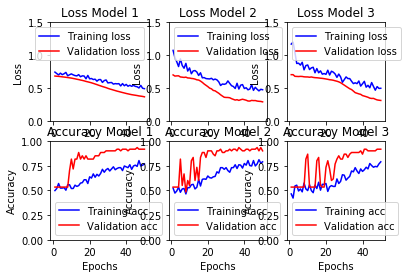

==================================== Start 2 fold ===============================


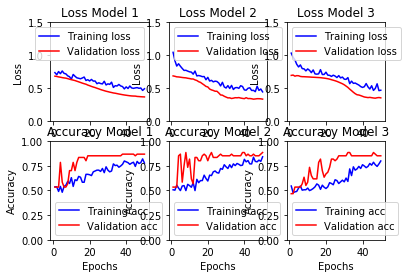

==================================== Start 3 fold ===============================


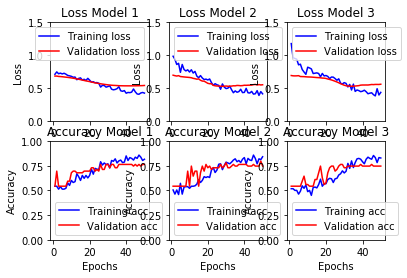

==================================== Start 4 fold ===============================


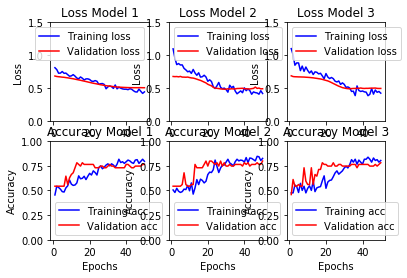

==================================== Start 5 fold ===============================


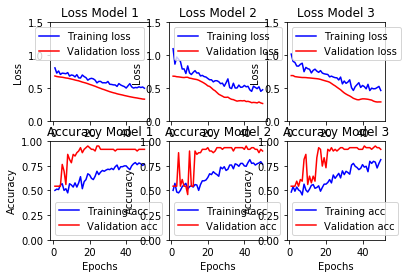

In [16]:
seed = 10
cvscores = [[],[],[]]
cvSensitivity = [[],[],[]]
cvSpecificity = [[],[],[]]
cvFalse = [[],[],[]]

count = 0

# Initial K-fold function to seperate dataset into train and validate
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# 5-fold cross validation
for train, val in kfold.split(X_corr, y_corr):
    # 
    X_train_kfold_corr = X_corr.iloc[train]
    y_train_kfold_corr = y_corr.iloc[train]
    X_val_kfold_corr = X_corr.iloc[val]
    y_val_kfold_corr = y_corr.iloc[val]
    
    # Pass data to preprocessing function
    X_train_kfold_pre_corr, X_val_kfold_pre_corr = preprocess_scaler_corr(X_train_kfold_corr, X_val_kfold_corr)

    # Get model
    model1 = build_model1()
    model2 = build_model2()    
    model3 = build_model3()
    
    modelList = [model1,model2,model3]
    pltList = [231,232,233]
    pltList2 = [234,235,236]

    print("==================================== Start "+str(count+1)+" fold ===============================")
    
    # Traning model
    for index in range(0,len(modelList)):
        sModel = modelList[index]
        # Training model
        history = sModel.fit(X_train_kfold_pre_corr, y_train_kfold_corr,
                            epochs=50, batch_size=32,
                             validation_data = (X_val_kfold_pre_corr, y_val_kfold_corr),
                               verbose=0)
        scores = sModel.evaluate(X_val_kfold_pre_corr, y_val_kfold_corr, verbose=0)
        
        # Collecting Accuracy score
        cvscores[index].append(scores[1] * 100)
        
        # Confusion Matrix
        predict = sModel.predict(X_val_kfold_pre_corr)
        predict = (predict > 0.5)
        cm = confusion_matrix(y_val_kfold_corr,predict)

        # Calculate Sensitivity
        sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
        cvSensitivity[index].append(sensitivity)
        # Calculate Specificity
        specificity = cm[1,1]/(cm[1,0]+cm[1,1])
        cvSpecificity[index].append(specificity)
        # Calculate False Negative
        cvFalse[index].append(1-sensitivity)

        # Plot Loss function graph
        history_dict = history.history
        loss_values = history_dict['loss']
        val_loss_values = history_dict['val_loss']
        acc_values = history_dict['acc']
        val_acc_values = history_dict['val_acc']
        epochs = range(1, len(loss_values)+1)
        plt.figure(2)
        plt.subplot(pltList[index])
        plt.plot(epochs, loss_values, 'b', label='Training loss')
        plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Model '+str(index+1))
        plt.ylim([0, 1.5])
        plt.legend()
        
        plt.subplot(pltList2[index])
        plt.plot(epochs, acc_values, 'b', label='Training acc')
        plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Model '+str(index+1))
        plt.ylim([0, 1])
        plt.legend()
        
    plt.show()
    count = count + 1

Finally, after the end of 5-fold cross validation, I summary average of each score (Accuracy, Sensiticity, Specificity, False Negative) to compare and select the best model for this Heart disease classification case.

In [17]:
# Show summary average score after the cross validation loop
for i in range(0,3):
    print("Model %d Summary --->" % (i+1))
    print("Accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores[i]), np.std(cvscores[i])))
    print(cvscores[i])
    print("Sensitivity : %.2f%% (+/- %.2f%%)" % (np.mean(cvSensitivity[i]), np.std(cvSensitivity[i])))
    print(cvSensitivity[i])
    print("Specificity : %.2f%% (+/- %.2f%%)" % (np.mean(cvSpecificity[i]), np.std(cvSpecificity[i])))
    print(cvSpecificity[i])
    print("False Negative : %.2f%% (+/- %.2f%%)" % (np.mean(cvFalse[i]), np.std(cvFalse[i])))
    print(cvFalse[i])
    print()

Model 1 Summary --->
Accuracy : 84.48% (+/- 6.94%)
[91.66666547457378, 86.66666785875957, 76.27118603657867, 76.27118633965314, 91.52542504213625]
Sensitivity : 0.90% (+/- 0.07%)
[0.96875, 0.96875, 0.78125, 0.84375, 0.9375]
Specificity : 0.78% (+/- 0.08%)
[0.8571428571428571, 0.75, 0.7407407407407407, 0.6666666666666666, 0.8888888888888888]
False Negative : 0.10% (+/- 0.07%)
[0.03125, 0.03125, 0.21875, 0.15625, 0.0625]

Model 2 Summary --->
Accuracy : 84.48% (+/- 6.25%)
[89.9999988079071, 88.33333373069763, 74.5762707823414, 79.6610158378795, 89.83050877765073]
Sensitivity : 0.88% (+/- 0.07%)
[0.9375, 0.96875, 0.78125, 0.84375, 0.875]
Specificity : 0.80% (+/- 0.08%)
[0.8571428571428571, 0.7857142857142857, 0.7037037037037037, 0.7407407407407407, 0.9259259259259259]
False Negative : 0.12% (+/- 0.07%)
[0.0625, 0.03125, 0.21875, 0.15625, 0.125]

Model 3 Summary --->
Accuracy : 84.15% (+/- 6.95%)
[91.66666746139526, 85.0000011920929, 74.5762707823414, 77.96610058364222, 91.52542504213625]


## 7. Result

From above summary average score of each model, I think the best model that I would select for this case is <b>Model 1 (4 layers, 48 neurons per layer, Sigmoid activation function, and Adagrad optimizer)</b>.

Because, it has highest average accuracy score and lowest False Negative score. A False Negative score is a test result that indicates a person does not have a disease or condition when the person actually does have it, so in term of medical case it is quite very sensitive for has high false negative result.

## 8. Conclusions

From this case, I have to try many techniques to preprocessing data and building proper model such as standardization, normalization, and correlation checking. So, I think that I achieved all aims of this assignment.

One problem that I found from this assignment is that because I choose to use cross validation for evaluating my model, so it is quite difficult to show some kind of metrics in summarization to compare each model such as confusion matrix, and classification report (f1-score, recall, precision). Because of multi-version for each fold and they are matrix, not single value.